<h1 style="text-align:center"> CRIANDO GRAFOS/REDES E FUNÇÕES BÁSICAS - Parte 1 </h1>
<p> Nesse primeiro contato iremos receber como entrada "listas de arestas", transformá-las em data frames do Pandas e depois em redes. </p>  
<p>Vamos criar redes usando o pacote NetworkX, que será a nossa referência, e depois criaremos manualmente usando Matriz,Lista de Aresta e Lista de Adjacência. Para cada uma dessas soluções iremos implementar funções básicas como: grau, existência de aresta, densidade e etc..</p>  
  
<br>  
  
<p style="font-size:10px; font-weight:bold">Material feito por Rodrigo Henrique Ramos - ramos@ifsp.edu.br</p>    

In [1]:
#Importação das bibliotecas/pacote e dos datasets
import pandas as pd #Dataframes
import networkx as nx #redes
import matplotlib.pyplot as plt #gráficos
import warnings # Para não mostrar warnings. Deixa o notebook mais limpo
warnings.filterwarnings('ignore')

#Vou criar um dicionário com todos os "inputs". Cada arquivo é uma lista de aresta, que irei transformar em dataframe
listaAresta = {}
listaAresta["rede1"] = pd.read_csv("datasets/rede1.tsv",sep="	") #tsv = Tab Separed Value, por isso o 	
listaAresta["rede2"] = pd.read_csv("datasets/rede2.tsv",sep="	")
listaAresta["rede3"] = pd.read_csv("datasets/rede3.tsv",sep="	")
listaAresta["rede4"] = pd.read_csv("datasets/rede4.tsv",sep="	")
#mostro o formato da lista de aresta referente a quarta rede. Mas só as 5 primeiras linhas
listaAresta["rede4"][:5]

,FROM,TO
0,A,B
1,A,C
2,A,D
3,A,E
4,B,C


<h1 style="text-align:center"> ARMAZENAMENTO/REPRESENTAÇÃO </h1>

<br><br>

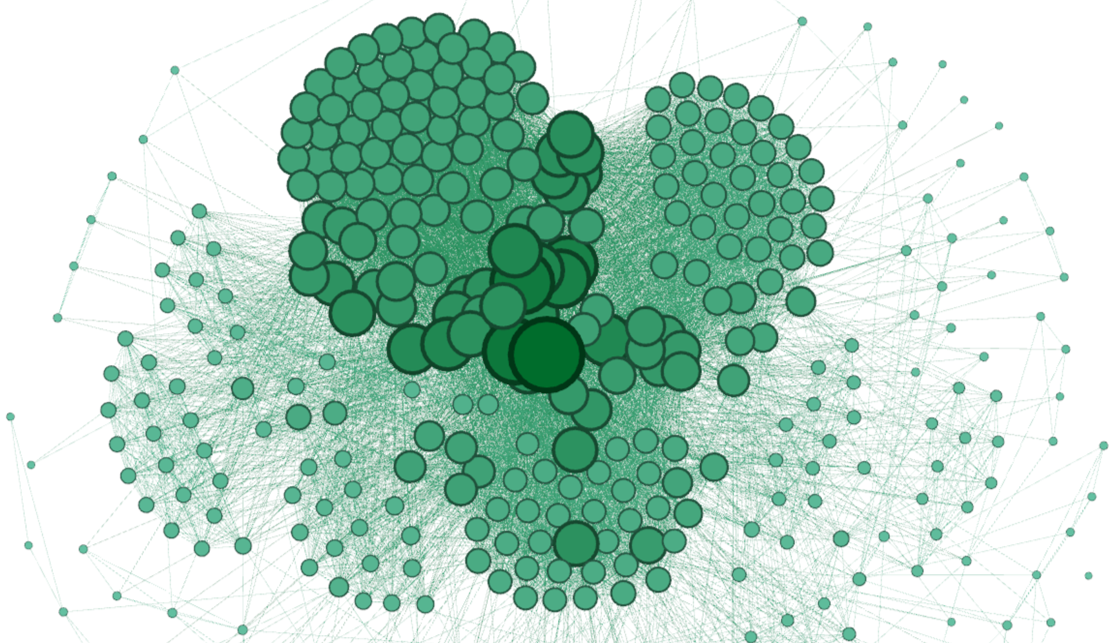

<div style="margin-top:15px;line-height:200%">
<b> Grafo ou Rede? </b> Existe uma discussão sobre o assunto. De certa forma são a mesma coisa, mas podemos dizer que GRAFO é um modelo matemático que representa relações (Arestas) entre objetos (Vértices) e que REDE é algo do mundo real que se pode representar usando um GRAFO. Em uma REDE social como o Facebook, as pessoas são os Vértices e as amizades são as Arestas. Mais informação sobre esse assunto: https://bence.ferdinandy.com/2018/05/27/whats-the-difference-between-a-graph-and-a-network/

<b>Armazenamento de Grafo na programação:</b> Existem 3 formas comumente utilizadas para armazenar grafos. Cada uma possui vantagens e desvantagens. Vale lembrar que a forma de armazenamento implica em algoritmos distintos para realizar a mesma tarefa, exemplo: Obter todos os vizinhos de um vértice. 
    <ul>
        <li><b>Matriz:</b> Permite acessar os elementos pelo índice M[i,j]. Facilita a implementação dos algoritmos e tratamento matemático. Ocupa muita memória. Um grafo com n vértices precisa de n² de espaço. Essa ineficiência de memória é pior em grafos com poucas arestas, já que muitos espaços vazios são ocupados. </li>
        <li><b>Lista de Adjacência: </b> É implementada como uma Matriz Esparsa. Para cada vértice é armazenado uma lista de "vizinhos". Se o grafo for denso (tiver muitas arestas) é melhor usar uma Matriz. Se o grafo for esparso (poucas arestas) é melhor usar Lista de Adjacência. Apesar de não permite acesso por índice e complicar o tratamento matemático, a Lista de Adjacência permite encontrar "instantaneamente" todos os vizinhos de um vértice, facilitando o desenvolvimento de algoritmos.</li>
        <li><b>Lista de Aresta: </b>É a forma de armazenamento mais econômica, pois só guarda as arestas. A Lista de Aresta pode ser uma lista de tuplas (VérticeA,VérticeB), ou uma matriz com duas colunas [Origem,Destino]. O problema é que essa abordagem dificulta a execução de algoritmos, aumentando a complexidade temporal. Ex: Considerando uma Lista de Arestas desordenada, encontrar todos os vizinhos de um vértice exige percorrer toda a lista, assim como encontrar se existe aresta entre dois vértices. Particularmente eu vejo a Lista de Aresta apenas como uma estrutura de armazenamento externo (quando é necessário salvar o grafo em arquivo). Todos as redes biológicas que trabalhei até hoje são disponibilizadas como Lista de Aresta.</li>        
    </ul>
<b>Resumo: </b> Lista de Aresta para armazenar a redes em arquivo. Matriz ou Lista de Adjacência para programar, a escolha entre as duas fica a cargo da densidade do grafo. Na dúvida, utilize Lista de Adjacência.

<br>
A figura abaixo apresenta 3 grafos de densidades diferentes e o seu armazenamento nas 3 formas comentadas. Observem que o primeiro e o terceiro têm a mesma quantidade de vértice, mas diferem muito na quantidade de arestas. As matrizes foram pintadas para demonstrar com mais clareza as células que guardam aresta (1) e as que guardam a inexistência de aresta (0).

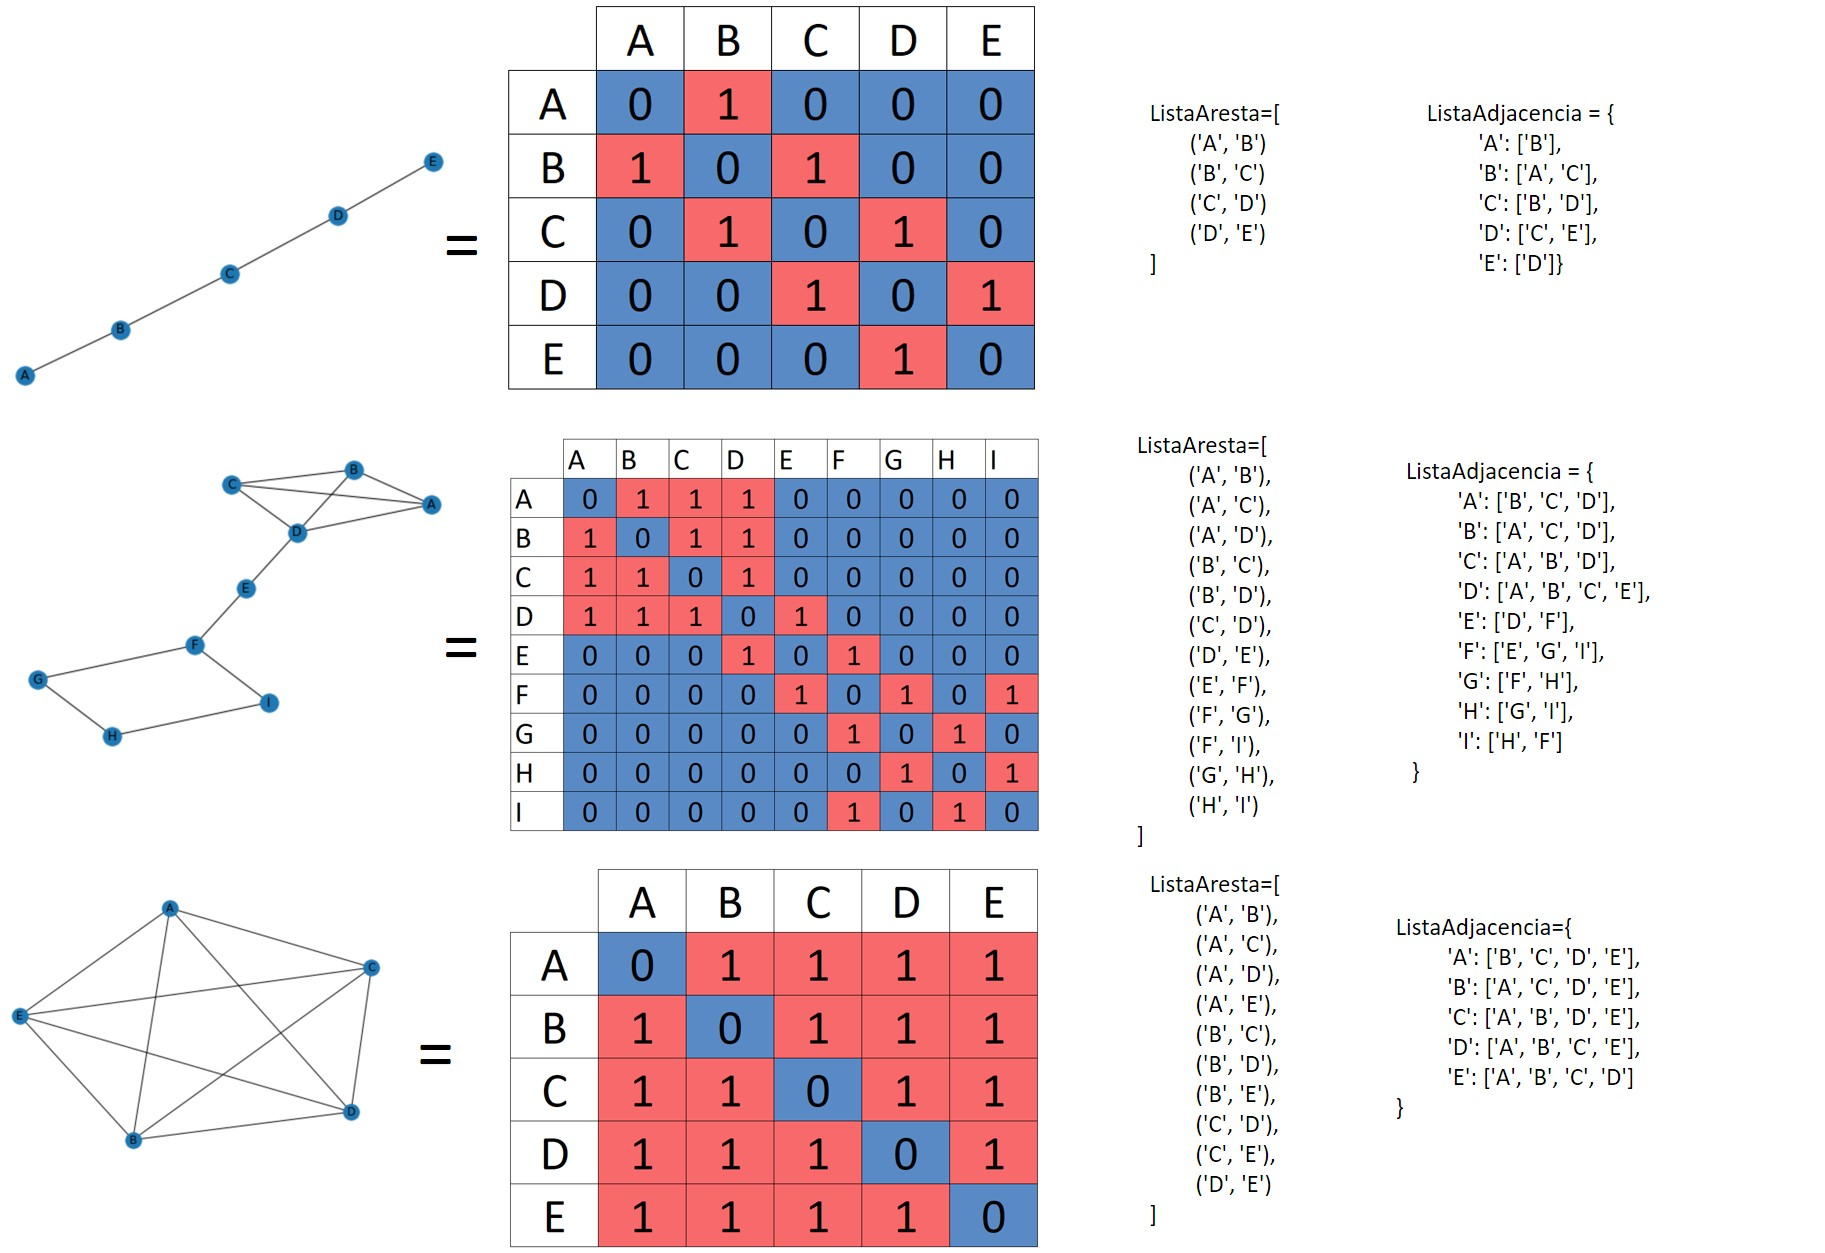

<b>Consideração final sobre armazenamento:</b> Futuramente iremos retomar a discussão sobre forma de armazenamento quando formos trabalhar com redes direcionadas (DiGraph) e arestas com peso.</b>

</div>

<h1 style="text-align:center"> PROGRAMANDO COM NETWORKX</h1>
<br>
<h7> NetworkX é um pacote Python para criação, manipulação e estudo da estrutura, dinâmismos e funções de redes complexas. <br> https://networkx.org/documentation/stable/ </h7>

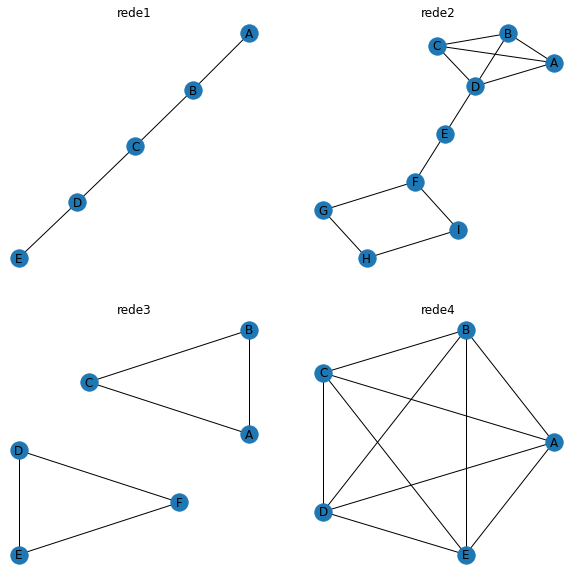

In [2]:
#O ponto principal é que programemos "na mão" as redes as medidas/funções. 
#Porém vou criar as redes usando o NetworkX para usarmos como referência e verificação da corretude do código
#Além de poder "plotar" as redes

listaRedesNX = {}
#Observem que estou criando um dicionário (listaRedesNX) para armazenar as 4 redes que temos. 
#Vejam também que uso a mesma chave do listaAresta para acessar o dataframe e criar um novo elemento em listaRedesNX
for key in listaAresta:
    listaRedesNX[key] = nx.from_pandas_edgelist(listaAresta[key],source="FROM",target="TO")
    
#Vou imprimir as quatro redes usando o a biblioteca plt.
fig, ax = plt.subplots(2,2,figsize=(10, 10)) # crio uma figura (fig) que separo em 4 parte chamadas de subplots (2,2), tipo matriz 2x2. ax vai ser utilizado para referenciar as posições dessa "matriz"

#As minhas redes estão em uma lista (listaRedesNX) e eu quero exibir elas em uma "matriz 2x2". Vou percorrer a lista e dinamicamente acessar os indices da "matriz"
linha=0
coluna=0
for rede in listaRedesNX:
    if(coluna==2): #Esse 2 é hardcoded mas serve pq sei qtas redes tenho. Se não soubesse teria que melhorar a lógica
        coluna=0
        linha+=1
    # Seleciono a posicao do subplot, add titulo e o plot
    plt.sca(ax[linha,coluna])
    ax[linha,coluna].set_title(rede)
    ax[linha,coluna] = nx.draw_kamada_kawai(listaRedesNX[rede],with_labels=True)    
    coluna+=1
    
#Exibo o gráfico
plt.show()

REDE1
A : 1 | B : 2 | C : 2 | D : 2 | E : 1 | 

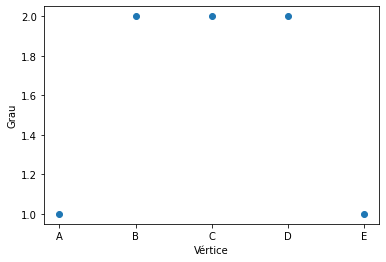

REDE2
A : 3 | B : 3 | C : 3 | D : 4 | E : 2 | F : 3 | G : 2 | H : 2 | I : 2 | 

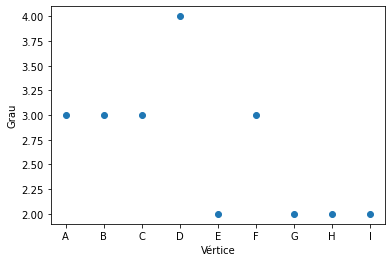

REDE3
A : 2 | B : 2 | C : 2 | D : 2 | E : 2 | F : 2 | 

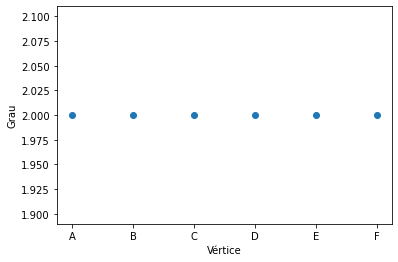

REDE4
A : 4 | B : 4 | C : 4 | D : 4 | E : 4 | 

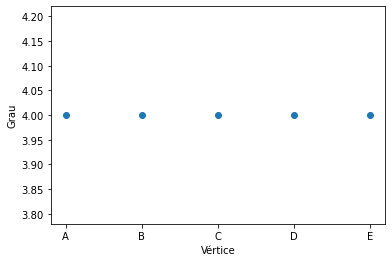

In [3]:
#========MEDIDAS=======
#
#Grau de cada nó com gráfico
for rede in listaRedesNX:
    graus=listaRedesNX[rede].degree()#Uso um método pronto do NX para pegar o grau.
    #print(graus)
    #Graus é uma lista de tupla com o nome do vertice e o grau dele. Vou imprimir essa informação de forma mais elegante
    print(rede.upper())
    for vertice in graus:
        print(vertice[0],":",vertice[1],end = ' | ')
        
    #Criando um gráfico para essa distribuição
    eixoX=[]
    eixoY=[]
    for vertice in graus: #poderia ter feito isso no for anterior, mas assim o código fica mais organizado
        eixoX.append(vertice[0])
        eixoY.append(vertice[1])
    plt.scatter(eixoX,eixoY) # scatter plot é um gráfico de pontos que recebe duas listas (x,y), associando assim o vertice ao seu grau. Esse gráfico ficaria melhor se a rede fosse maior
    #plt.plot(eixoY) # Descomente esse e comente o scatter para ver a diferença
    plt.xlabel("Vértice")
    plt.ylabel("Grau")
    plt.show()

In [4]:
#Aqui irei verificar se existe aresta entre um vertice e outro. Veja, é aresta e não caminho
# No caso verificarei as arestas A-B e A-D
for rede in listaRedesNX:
    print(rede.upper())
    resposta=listaRedesNX[rede].has_edge("A","B")
    print(resposta)
    resposta=listaRedesNX[rede].has_edge("A","D")
    print(resposta,'\n')    

REDE1
True
False 

REDE2
True
True 

REDE3
True
False 

REDE4
True
True 

